<a href="https://colab.research.google.com/github/022000FERNANDO/upsrj-keras-workspace/blob/main/dnnlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## red densa con keras para prediccion lineal
# objetivo:
implementar una red neuronal completamente conectada (dnn) simple usando keras, para predecir la resistencia del concreto (strenghith) a partir de us componentes quimicos


1 "cargar y preparar los datos"

usaremos el datasheet de ejemplo de uc livine para elo seguiremos los pasos del

In [4]:
import pandas as pd
#URL del dataset a utilizar
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
#carga de detos del url
data = pd.read_excel(url)
#mostrar las primeras filas
data.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Necesitamos ahora separar los predictores y la variable objetivo de nuestra base de datos. Para ello, sleccionaremos la columna
"Concrete compressive strongh (MPa, megapascals)" como nuestro selector, y el resto como nuestros predictores


In [25]:
#columna de strengh
strenght_column= "Concrete compressive strength(MPa, megapascals) "

In [19]:
#separar predictores
predictors = data.drop(columns=["Concrete compressive strength(MPa, megapascals) "])
predictors.head()

#separar selector
selector =  data.drop(columns=["Concrete compressive strength(MPa, megapascals) "])
selector. head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [26]:
selector = data[strenght_column]
selector.head()


,"Concrete compressive strength(MPa, megapascals)"
0,79.986111
1,61.887366
2,40.269535
3,41.052780
4,44.296075


In [27]:
#obtenemos el numero de columnas de nuestras predictores
n_cols = predictors.shape[1]
print(n_cols)



8


2 ** definir el modelo **

necesitamos generar un modelo secuencial con una red neuronal densa
(DNN) con una capa de entrada, una capa oculta y una de salida, la
capa de salida contendra solo una neurona sobre la cual va a divergir todo el conetenido de la capa previa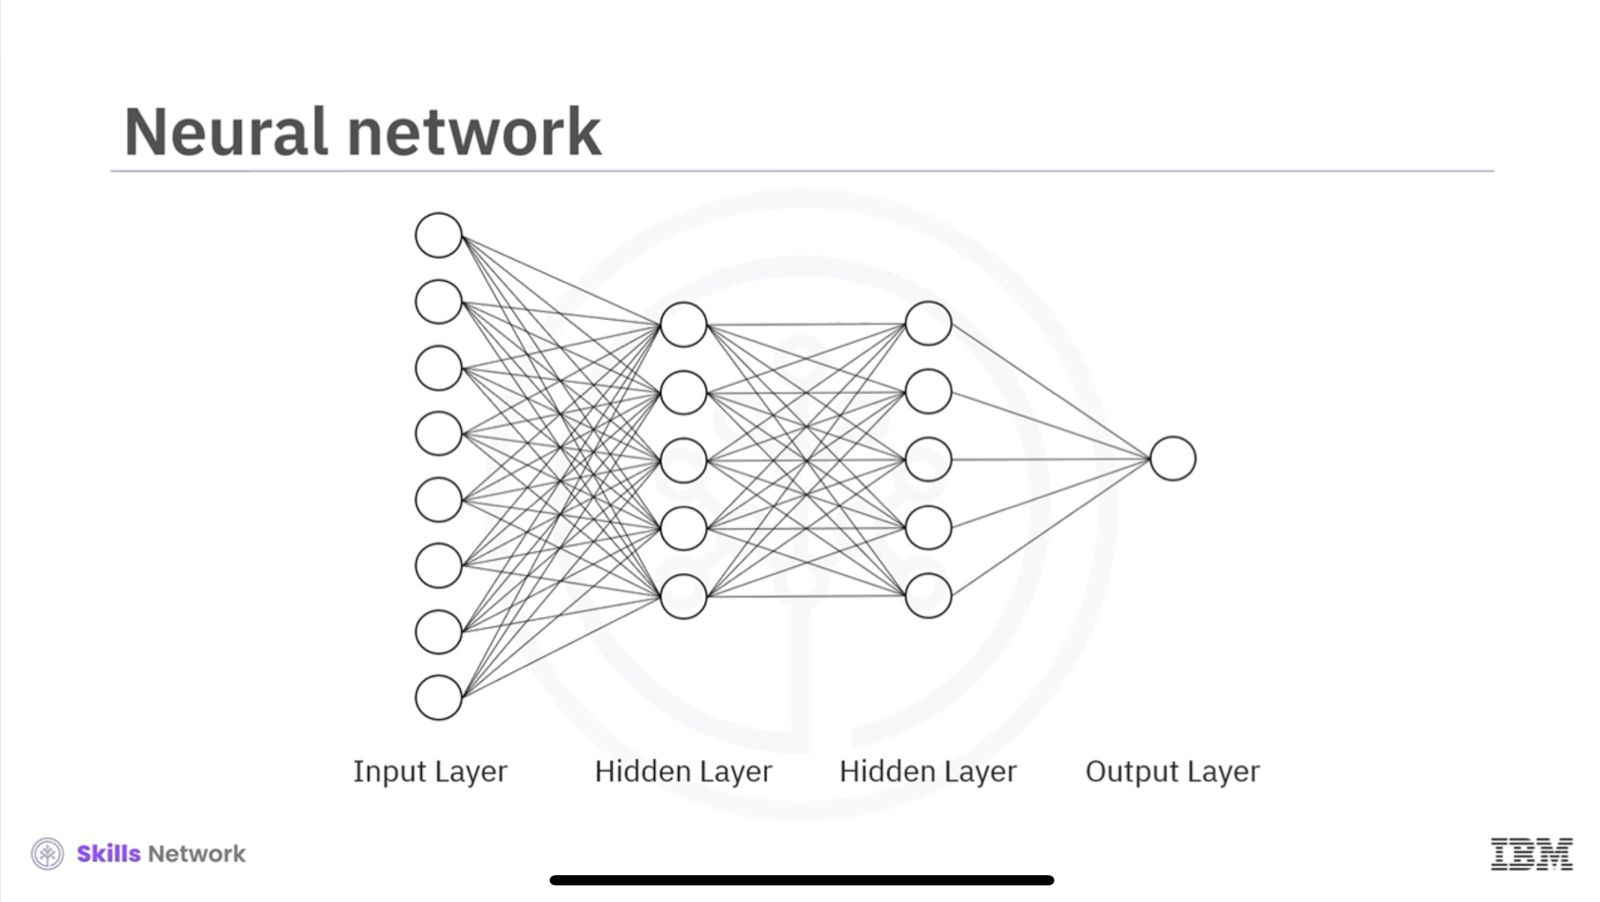

In [57]:
from keras.models import Sequential
from keras.layers import Dense

#creamos un modelo sencuencial
model = Sequential()

#definimos capa de entrada y ocultas
model.add(Dense(5, activation= 'relu',input_shape=(n_cols, )))

#definimos capa oculta
model.add(Dense(5, activation= 'relu'))

#definimos capa de salida ( una sola neurona)
model.add(Dense(1))

#compilamos
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3.Entrenar y evaluar Necesitamos ingresar el contenido del dataset a nuestra red DNN para obtener un resultado. Posteriormente necesitamos generar una predicción con el modelo alimentado y evaluar que tan efectivo es nuestro modelo para predecir variables.


In [58]:
# entrenamiento
history = model.fit(predictors, selector, epochs=50, verbose=1)

#Predicción (con los primeros elementos de los predictores)
predictions = model.predict(predictors)
print(predictors)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18883.6797
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6806.0469
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4338.6270
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3339.4907
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2794.0266 
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2420.4331
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2296.2771
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2068.1748
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1955.6542
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1920.2014
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1738.1747
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1775.8661
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1701.8331 
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1614.1573
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0

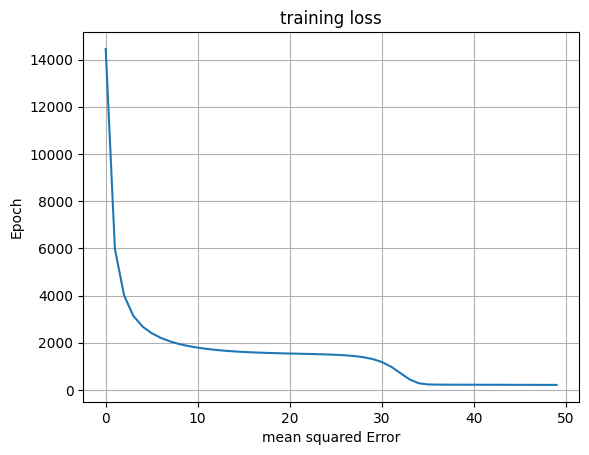

In [59]:
import matplotlib.pyplot as plt
#grafica de perdida
plt.plot(history.history['loss'])
plt.title('training loss')
plt.ylabel('Epoch')
plt.xlabel('mean squared Error')
plt.grid(True)
plt.show()

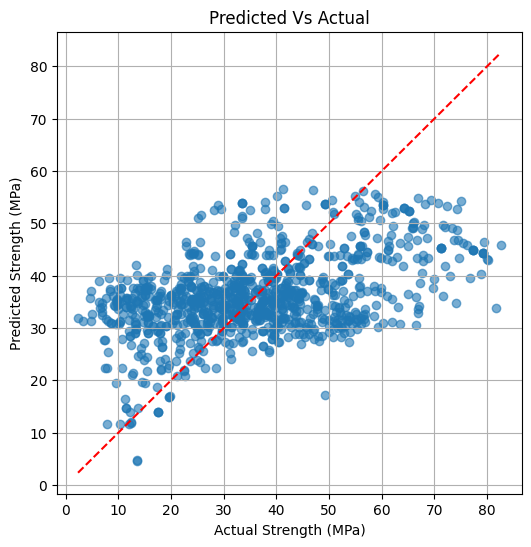

In [62]:
# Gráfico de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(selector, predictions, alpha=0.6)
plt.xlabel('Actual Strength (MPa)')
plt.ylabel('Predicted Strength (MPa)')
plt.title('Predicted Vs Actual')
plt.grid(True)
plt.plot([selector.min(), selector.max()], [selector.min(), selector.max()], 'r--')
plt.show()

## **Ejercicio: Mejorar una red densa con Keras**

## Objetivo

Predecir la resistencia del concreto mejorando la red original mediante:
- Más capas ocultas
- Más epochs
- Integración de funciones de activación no lineales (sigmoidea)

#instrucciones:
1. aumenta la densidad de la capa de entrada de 8 a 10 nodos
2. modifica las capas ocultas de la red para que sean 3, con la siguiente
numero de jodos respectivamente 10, 8, 6.
3. cambioa la funcion de activacion de la capa de salida por una sigmoide
4. alimenta la red con un  valor de 200 nodos

Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 68745.2656
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12942.1729
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 634.1850
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 443.7158 
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 424.5194
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 394.8026
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 402.0656
Epoch 8/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 365.9571
Epoch 9/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 346.5353
Epoch 10/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 328.8052
Epoch 11/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 322.3122
Epoch 12/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 284.9593
Epoch 13/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 284.7196
Epoch 14/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 289.0615
Epoch 15/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

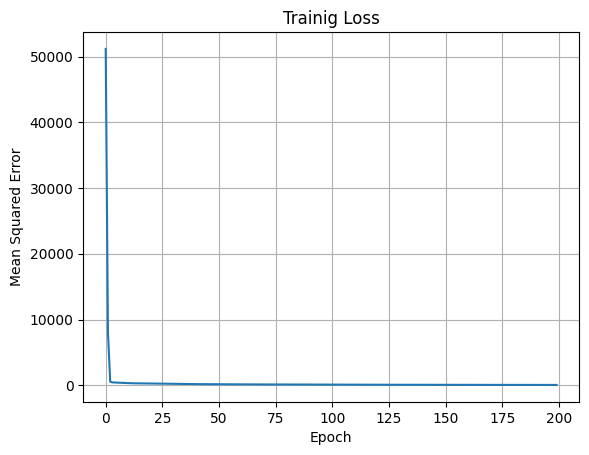

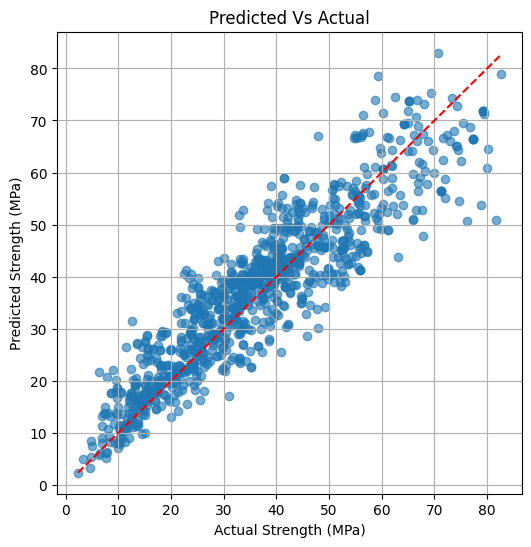

In [61]:
model_improved = Sequential()

# Input layer
model.add(Dense(10, activation='relu', input_shape=(n_cols, )))
# Hidden layers
model_improved.add(Dense(10, activation='relu'))
model_improved.add(Dense(8, activation='relu'))
model_improved.add(Dense(6, activation='relu'))
# Output layer
model_improved.add(Dense(1, activation='linear'))

model_improved.compile(optimizer='adam', loss='mean_squared_error')

#Entrenamiento
history_improved = model_improved.fit(predictors, selector, epochs=200, verbose=1)

#Predicción (con los primeros elementos de los predictores)
prediction_improved = model_improved.predict(predictors)

# Gráfico de perdida
plt.plot(history_improved.history['loss'])
plt.title('Trainig Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

#Gráfico de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(selector, prediction_improved, alpha=0.6)
plt.xlabel('Actual Strength (MPa)')
plt.ylabel('Predicted Strength (MPa)')
plt.title('Predicted Vs Actual')
plt.grid(True)
plt.plot([selector.min(), selector.max()], [selector.min(), selector.max()], 'r--')
plt.show()